In [1]:
# Cell 1: Imports
import pandas as pd
import matplotlib.pyplot as plt

# Bring in your parser
from manufacturelog import validate_and_extract_log

# (Optional) configure matplotlib for nicer dates
plt.rcParams["figure.autolayout"] = True


[{'Batch ID': '1323', 'Product Code': 'BD', 'Quantity': 1234, 'Date': '20210919'}]


In [2]:
import random
from datetime import datetime, timedelta

# Generate synthetic log for 30 days
start = datetime(2023,9,1)
entries = []
for i in range(30):
    date = (start + timedelta(days=i)).strftime("%Y%m%d")
    # 1–3 batches per day, random product codes and quantities
    for _ in range(random.randint(1,3)):
        pid = random.choice(["AB","XY","BD"])
        qty = random.randint(10,200)
        bid = f"{random.randint(1000,9999)}"
        entries.append(f"B{bid}P{pid}Q{qty:03d}D{date}")

sample_log = "".join(entries)


In [3]:
# Cell 2: Parse the synthetic month-long sample_log
parsed = validate_and_extract_log(sample_log)
parsed[:5]  # show just the first five entries for brevity


[{'Batch ID': '2485',
  'Product Code': 'XY',
  'Quantity': 37,
  'Date': '20230901'},
 {'Batch ID': '5992',
  'Product Code': 'AB',
  'Quantity': 104,
  'Date': '20230901'},
 {'Batch ID': '3605',
  'Product Code': 'XY',
  'Quantity': 88,
  'Date': '20230901'},
 {'Batch ID': '4387',
  'Product Code': 'BD',
  'Quantity': 191,
  'Date': '20230902'},
 {'Batch ID': '5963',
  'Product Code': 'XY',
  'Quantity': 73,
  'Date': '20230902'}]

In [4]:
# Cell 3: Convert to DataFrame and clean types
df = pd.DataFrame(parsed)

# Ensure Quantity is numeric and Date is a datetime
df["Quantity"] = df["Quantity"].astype(int)
df["Date"] = pd.to_datetime(df["Date"], format="%Y%m%d")

# Display the first few rows
df.head()


,Batch ID,Product Code,Quantity,Date
0,2485,XY,37,2023-09-01
1,5992,AB,104,2023-09-01
2,3605,XY,88,2023-09-01
3,4387,BD,191,2023-09-02
4,5963,XY,73,2023-09-02


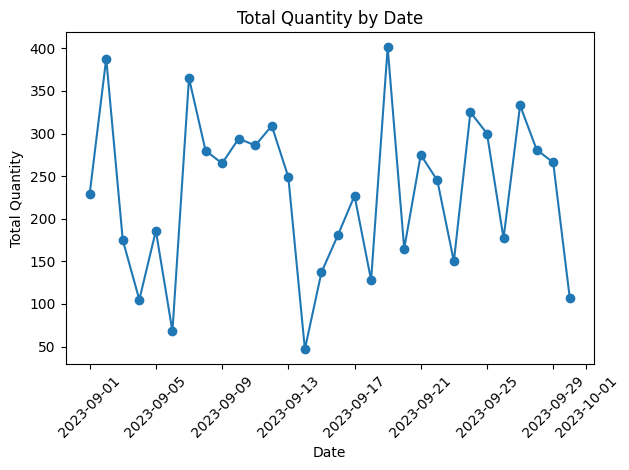

In [5]:
# Cell 4: Aggregate and plot total Quantity per Date
daily = df.groupby("Date", as_index=False)["Quantity"].sum()

plt.figure()
plt.plot(daily["Date"], daily["Quantity"], marker="o")
plt.title("Total Quantity by Date")
plt.xlabel("Date")
plt.ylabel("Total Quantity")
plt.xticks(rotation=45)
plt.show()


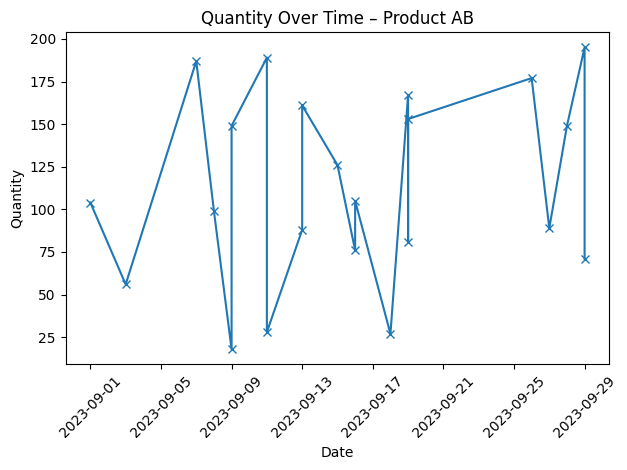

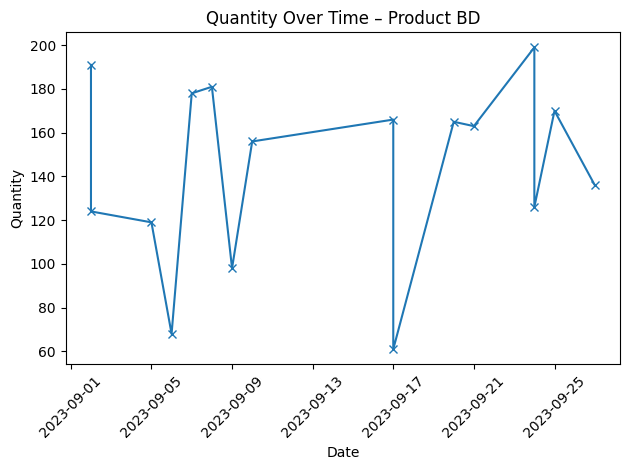

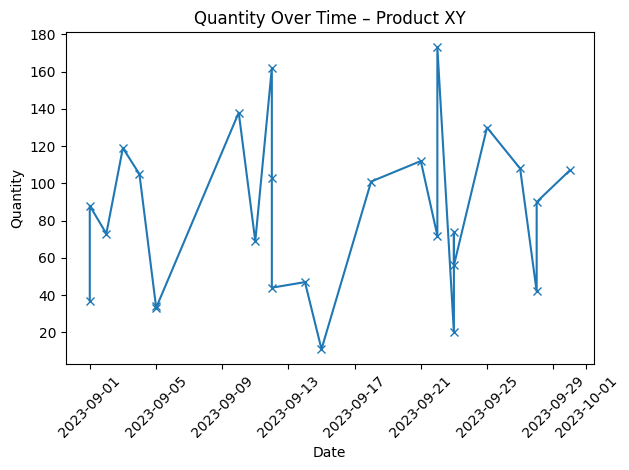

In [6]:
# Cell 5: Plot one line per product code
for code, group in df.groupby("Product Code"):
    plt.figure()
    plt.plot(group["Date"], group["Quantity"], marker="x")
    plt.title(f"Quantity Over Time – Product {code}")
    plt.xlabel("Date")
    plt.ylabel("Quantity")
    plt.xticks(rotation=45)
    plt.show()


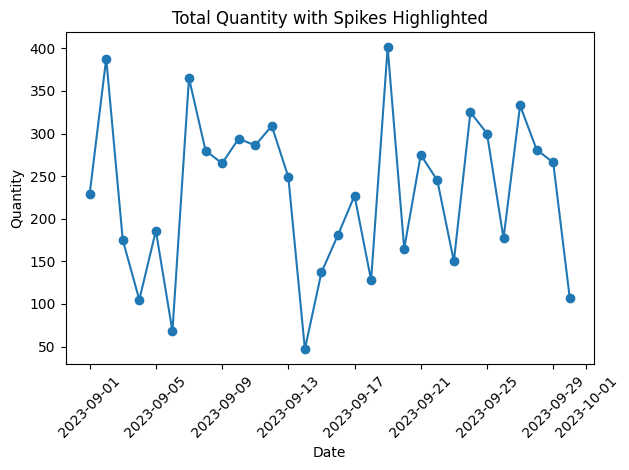

In [7]:
threshold = daily["Quantity"].mean() + 2 * daily["Quantity"].std()
spikes = daily[daily["Quantity"] > threshold]

plt.figure()
plt.plot(daily["Date"], daily["Quantity"], marker="o")
for _, row in spikes.iterrows():
    plt.annotate("Spike", (row["Date"], row["Quantity"]),
                 textcoords="offset points", xytext=(0,10), ha="center")
plt.title("Total Quantity with Spikes Highlighted")
plt.xlabel("Date"); plt.ylabel("Quantity")
plt.xticks(rotation=45); plt.show()
